<a href="https://colab.research.google.com/github/yain22/Data-manipulation-with-R-and-Python/blob/master/time_series_unit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Unit

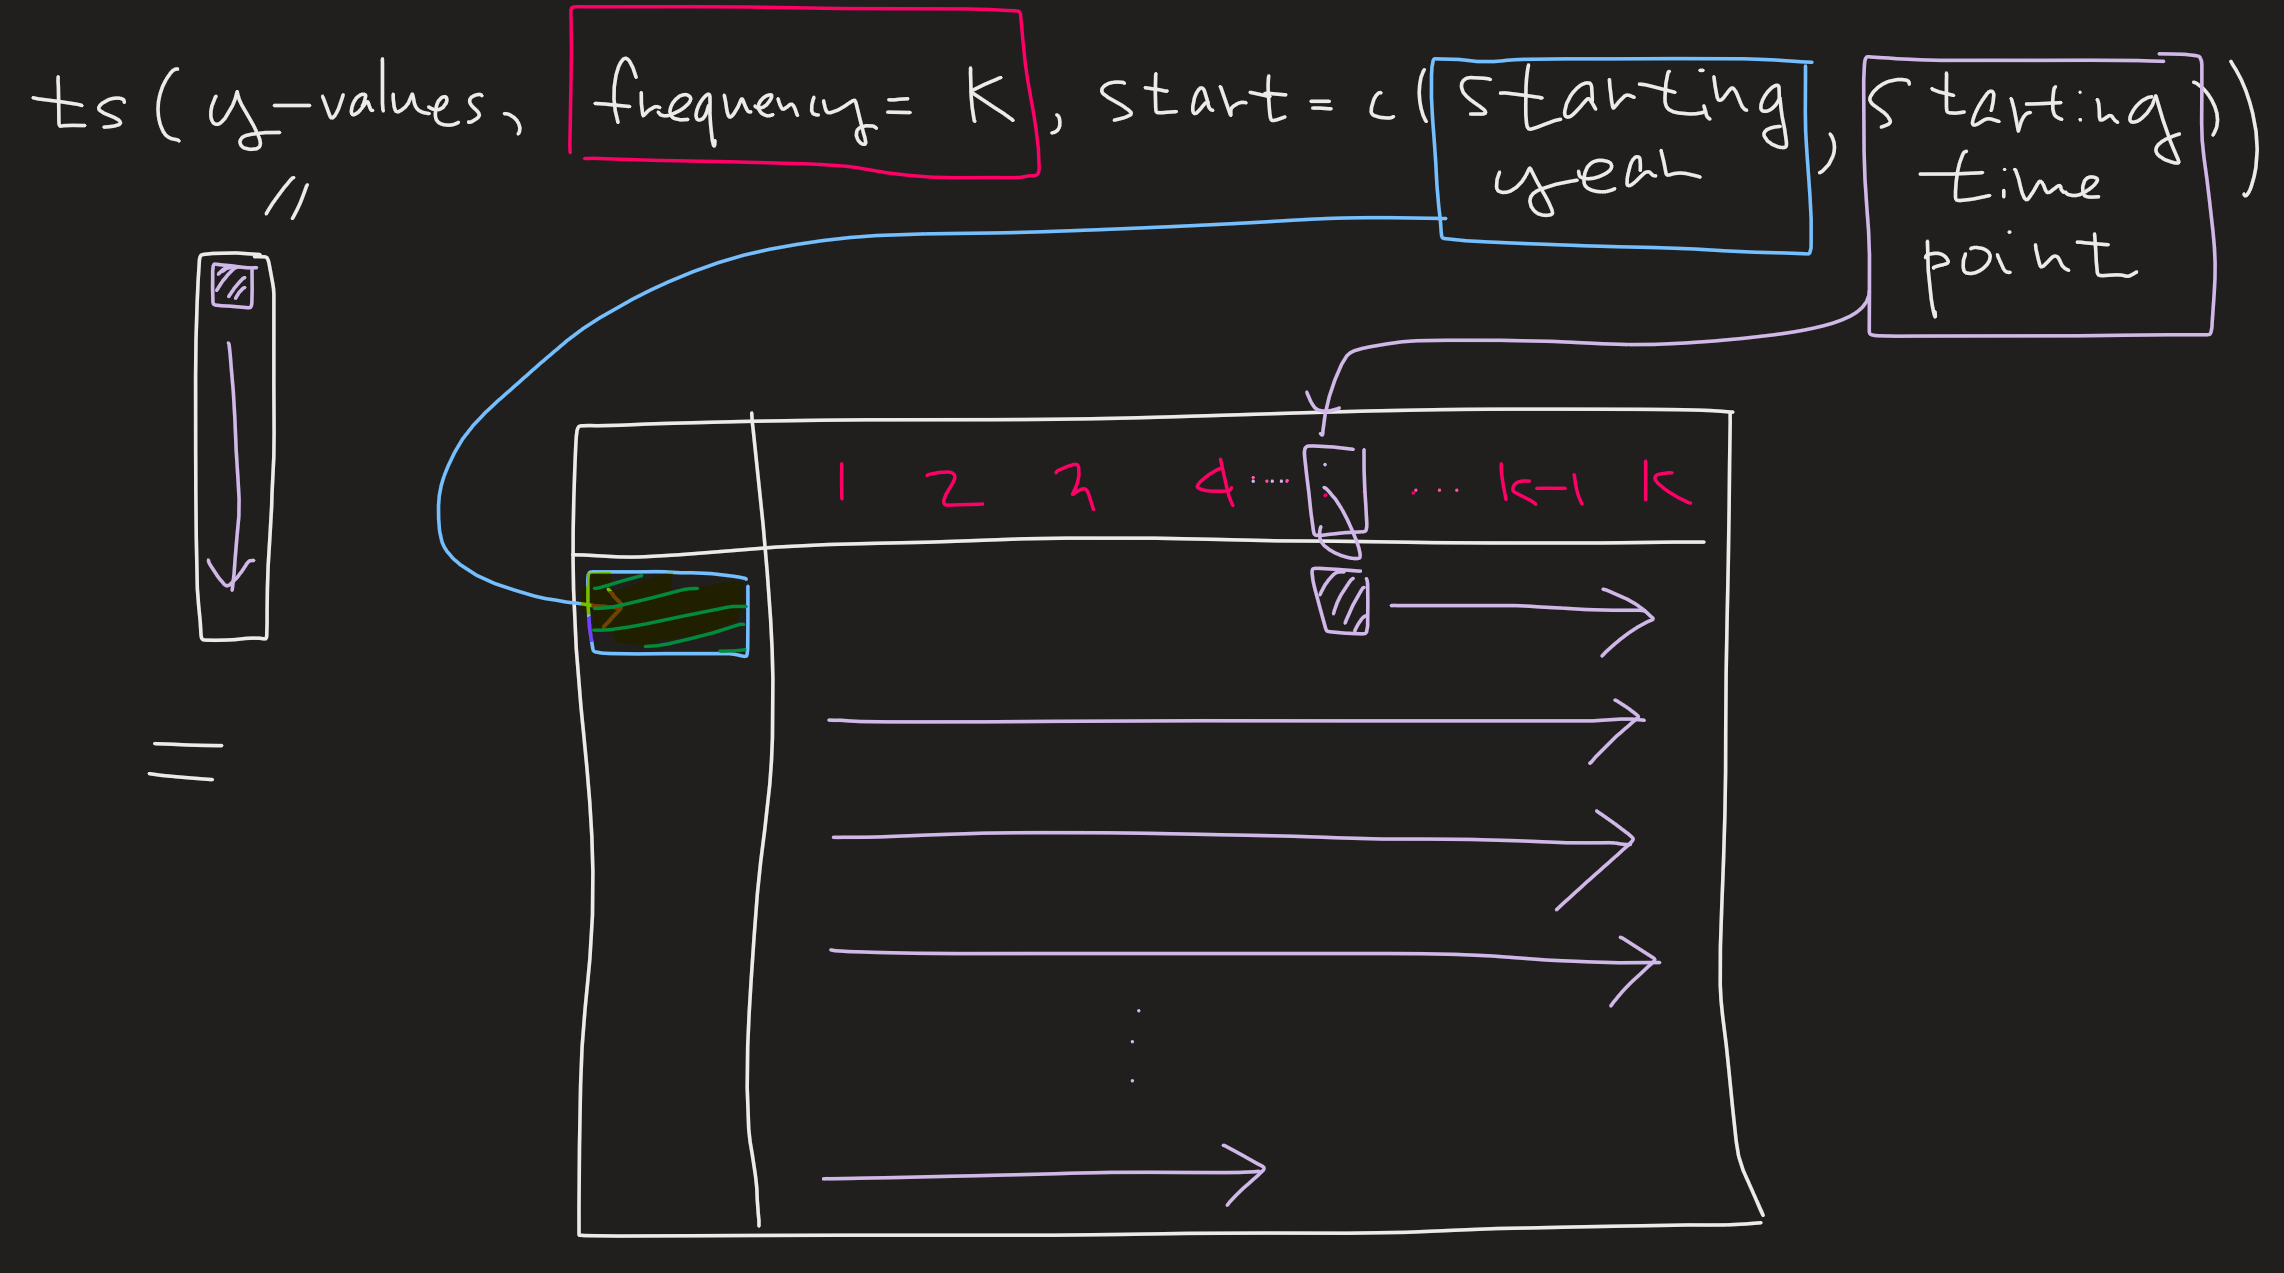

In [4]:
install.packages("ggfortify")
install.packages("zoo")
library("ggplot2")
library("ggfortify") # {ggfortify} let {ggplot2} know how to interpret ts objects. After loading {ggfortify}, you can use ggplot2::autoplot function for ts objects.
library("zoo") 

## Example 1

,Qtr1,Qtr2,Qtr3,Qtr4
1959,,1,2,3
1960,4,5,6,7
1961,8,9,10,


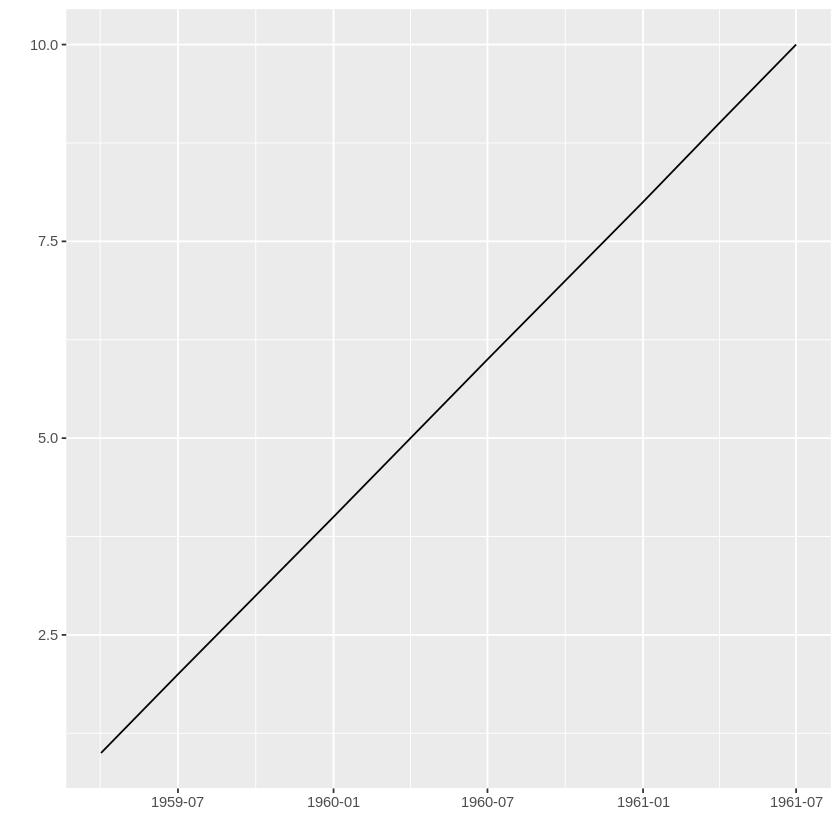

In [52]:
df_eg_1 = ts(1:10, frequency = 4, start = c(1959, 2)) # 2nd Quarter of 1959
df_eg_1
autoplot(df_eg_1)

## Example 2

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1954,,,,,,,0.73,1.51,2.19,3.68,5.54,7.35
1955,7.36,8.70,9.09,10.76,12.23,13.47,13.49,15.30,15.40,16.55,17.68,18.99
1956,20.22,22.49,22.79,24.86,24.83,25.36,26.35,27.48,27.42,29.66,29.77,30.62
1957,31.60,33.49,35.07,35.39,37.69,37.72,39.79,40.72,43.17,44.11,45.01,47.71
1958,48.03,49.83,49.79,52.15,52.86,55.17,57.37,58.67,59.39,61.89,62.73,62.94
1959,65.05,67.67,69.35,71.68,72.74,73.31,73.59,75.12,76.67,78.91,80.44,81.31
1960,84.33,85.45,86.36,88.02,89.31,90.30,92.32,92.52,91.87,93.28,92.95,93.63
1961,95.61,96.60,96.96,98.39,100.81,102.34,103.03,104.44,104.94,106.41,106.93,108.84
1962,111.42,111.71,112.37,112.71,115.03,115.03,114.96,116.00,117.78,119.63,,


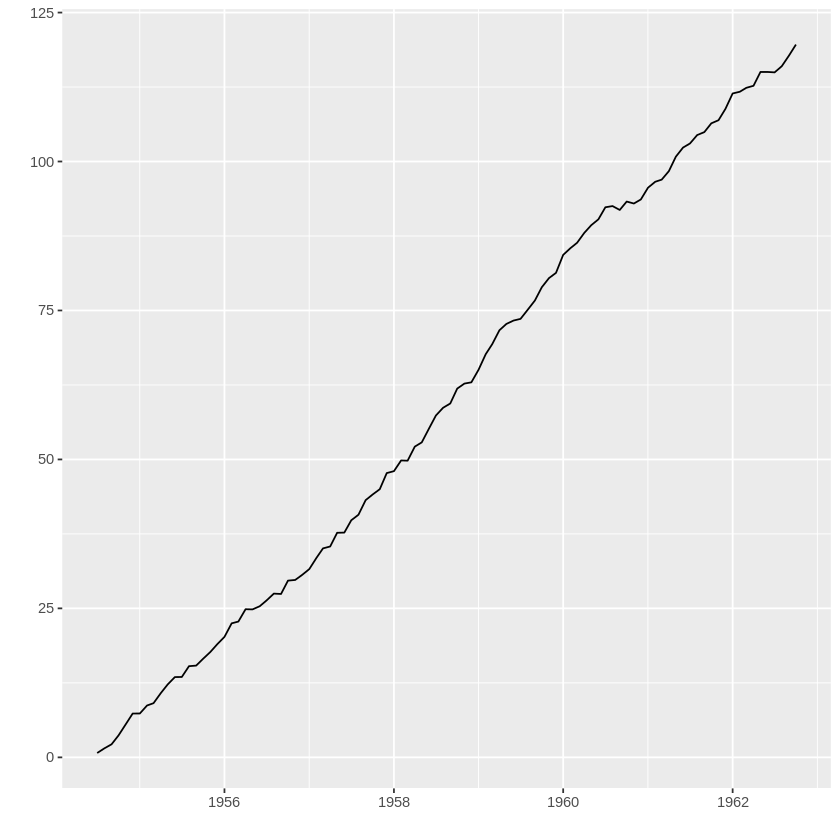

In [20]:
gnp <- ts(cumsum(1 + round(rnorm(100), 2)),
          start = c(1954, 7), frequency = 12)
gnp
autoplot(gnp)

## Example 3 (Petroleum data)

In [23]:
install.packages("tidyverse")
library("tidyverse")
# Import dataset
time_series_F <- read_csv("time_series(F).csv", col_types = cols(API10 = col_number()))

df_1 = gather(time_series_F,"t","production",2:79)
df_2 = mutate(df_1, API10_char = paste("API",API10) )
df_3 = df_2 %>% 
       filter(production > 0) %>% 
       group_by(API10_char) %>% 
       summarise(n = n(), mean_prod = mean(production))

Month_to_No = function(month.vec){
  
  # Input: H dimensional vector for characterized "month" from "Jan" to "Dec"  
  
  H = length(month.vec) 
  month.output = c()
  
  for (h in 1:H){
    
    month = month.vec[h]
    
    {
      if (month == "Jan"){
        res = "01"
      }
      if (month == "Feb"){
        res = "02"
      }
      if (month == "Mar"){
        res = "03"
      }
      if (month == "Apr"){
        res = "04"
      }
      if (month == "May"){
        res = "05"
      }
      if (month == "Jun"){
        res = "06"
      }
      if (month == "Jul"){
        res = "07"
      }
      if (month == "Aug"){
        res = "08"
      }
      if (month == "Sep"){
        res = "09"
      }
      if (month == "Oct"){
        res = "10"
      }
      if (month == "Nov"){
        res = "11"
      }
      if (month == "Dec"){
        res = "12"
      }
    }
    
    month.output[h] = res
  }
  
  return(month.output)
}

df_4 = df_2 %>% 
  filter(production > 0) %>% 
  group_by(API10_char) %>%
  arrange(API10_char,t) %>% 
  separate(t, c("year","month"), sep = "-") %>%
  mutate(monthnumber = Month_to_No(month)) %>%
  arrange(API10_char,year,monthnumber) %>% 
  unite("year_month",year,monthnumber, sep = "-") 
  

################# Example: get number out of character ##############
year_month<-c("17-12")
matches <- regmatches(year_month, gregexpr("[[:digit:]]+", year_month))
as.numeric(unlist(matches))[1]*100 + as.numeric(unlist(matches))[2]
#####################################################################

extract_year_month = function(year_month_vec){

  # Input: H dimensional vector for characterized by the form like "17-03"
  # Output: H dimensional vector with numbers "1703"   
  #####################################################################

  H = length(year_month_vec) 
  year_month_output = c()
  
  for (h in 1:H){
    
    year_month = year_month_vec[h]
    matches <- regmatches(year_month, gregexpr("[[:digit:]]+", year_month))
    res = as.numeric(unlist(matches))[1]*100 + as.numeric(unlist(matches))[2]
    year_month_output[h] = res
  }
  
  return(year_month_output)  
}

df_5 = df_4 %>% 
            mutate(year_month_no = extract_year_month(year_month))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

`summarise()` ungrouping output (override with `.groups` argument)



[1] 1712

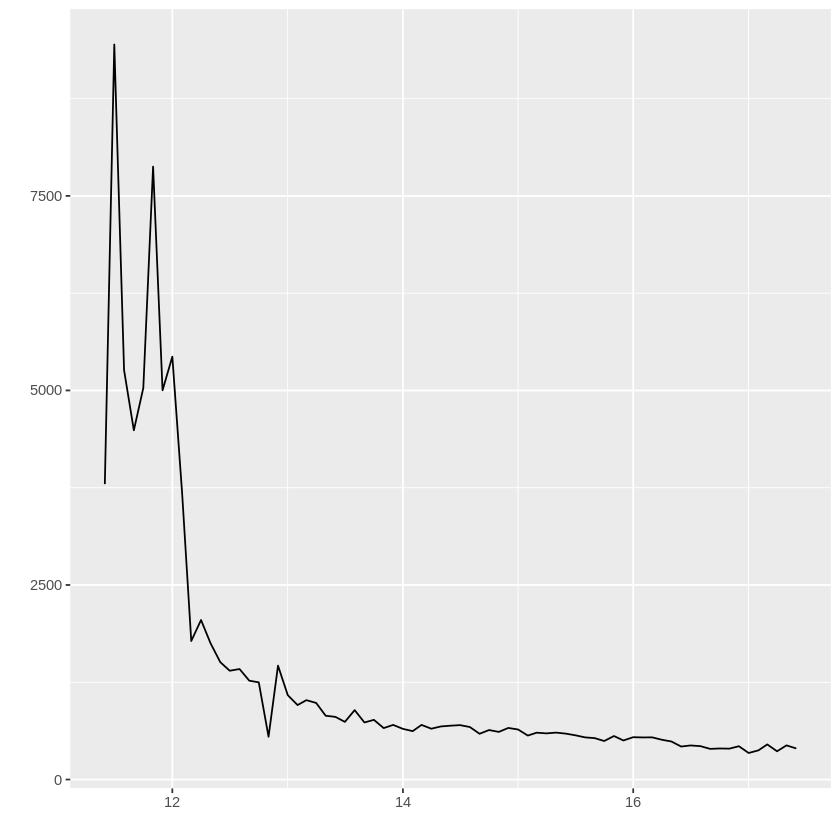

In [54]:
# Select well index
i = 301

temp_df = filter(df_5, API10 == df_5$API10[i])

production_period = nrow(temp_df)
starting_month = (temp_df$year_month_no%%100)[1]
starting_year = round((temp_df$year_month_no)[1],-2)*0.01

autoplot(ts(temp_df$production, frequency = 12, start = c(starting_year, starting_month)))

In [81]:
df_5


API10,year_month,month,production,API10_char,year_month_no
<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>
4201334335,11-04,Apr,517,API 4201334335,1104
4201334335,11-05,May,2099,API 4201334335,1105
4201334335,11-06,Jun,4935,API 4201334335,1106
4201334335,11-07,Jul,3223,API 4201334335,1107
4201334335,11-08,Aug,2677,API 4201334335,1108
4201334335,11-09,Sep,2233,API 4201334335,1109
4201334335,11-10,Oct,2153,API 4201334335,1110
4201334335,11-11,Nov,1575,API 4201334335,1111
4201334335,11-12,Dec,1587,API 4201334335,1112


## Example 4 (World Bank Open Data)

Raw data source: https://data.worldbank.org/

In [55]:
ag_gdp_df <- read_csv("https://raw.githubusercontent.com/mjfrigaard/storybenchR/master/data/aggdp_worldbank.csv")
ind_gdp_df <- read_csv("https://raw.githubusercontent.com/mjfrigaard/storybenchR/master/data/indgdp_worldbank.csv")
serv_gdp_df <- read_csv("https://raw.githubusercontent.com/mjfrigaard/storybenchR/master/data/servgdp_worldbank.csv")

Parsed with column specification:
cols(
  .default = col_double(),
  Country = col_character()
)

See spec(...) for full column specifications.

Parsed with column specification:
cols(
  .default = col_double(),
  Country = col_character()
)

See spec(...) for full column specifications.

Parsed with column specification:
cols(
  .default = col_double(),
  Country = col_character()
)

See spec(...) for full column specifications.



In [58]:
ag_gdp_df %>% glimpse()

Country,1960,1961,1962,1963,1964,1965,1966,1967,1968,⋯,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Australia,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,2.9767115,2.4014016,2.5203360,2.4667681,2.3782305,2.4664068,2.4469746,2.4811149,2.4058594,2.3844787
Brazil,20.59281,19.49661,17.35049,16.79391,17.28612,18.709918,15.692939,15.108760,14.050292,⋯,5.1380722,5.1800194,5.4084616,5.2359811,4.8422555,5.1112814,4.9124788,5.2943686,5.2226813,5.2147945
Canada,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,1.5072236,1.7027236,1.4719312,1.4232866,1.7138329,1.7600449,NA,NA,NA
China,23.38367,36.15574,39.42400,40.33893,38.44567,37.940679,37.591006,40.261571,42.150775,⋯,10.7109088,10.3660407,10.3383818,9.8816882,9.6244342,9.5333732,9.5282709,9.4081540,9.1736380,8.9939853
Germany,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,0.7801948,0.8254767,0.8944901,0.7361243,0.7193021,0.8223377,0.7718414,0.7899529,0.6825157,0.5494578
France,NA,NA,NA,NA,NA,8.947808,8.736554,8.668568,8.342099,⋯,1.6979597,1.8002989,1.6867128,1.4645220,1.7819168,1.8407157,1.8189970,1.6271600,1.7308981,1.7362584
United Kingdom,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,0.6420777,0.6490775,0.7182887,0.6166078,0.7379034,0.6864914,0.6818659,0.6938977,0.6897216,0.6799033
India,42.56113,41.77397,39.88880,41.07578,42.95913,40.913571,41.814131,44.526199,43.522044,⋯,18.2882251,18.2562719,17.7843324,17.7366365,18.2054294,18.5257089,18.2496545,18.3266140,17.3917337,NA
Japan,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,1.1836499,1.1489150,1.1474625,1.1640654,1.1812657,1.1569540,1.2141416,1.1967049,1.1734479,NA


In [74]:
# Table Data => Multi-level data
ag_gdp_df_multi_level = ag_gdp_df %>% gather("year","gdp",2:57) %>% arrange(Country,year) %>% filter(gdp > 0)
ag_gdp_df_multi_level$year = as.numeric(ag_gdp_df_multi_level$year)

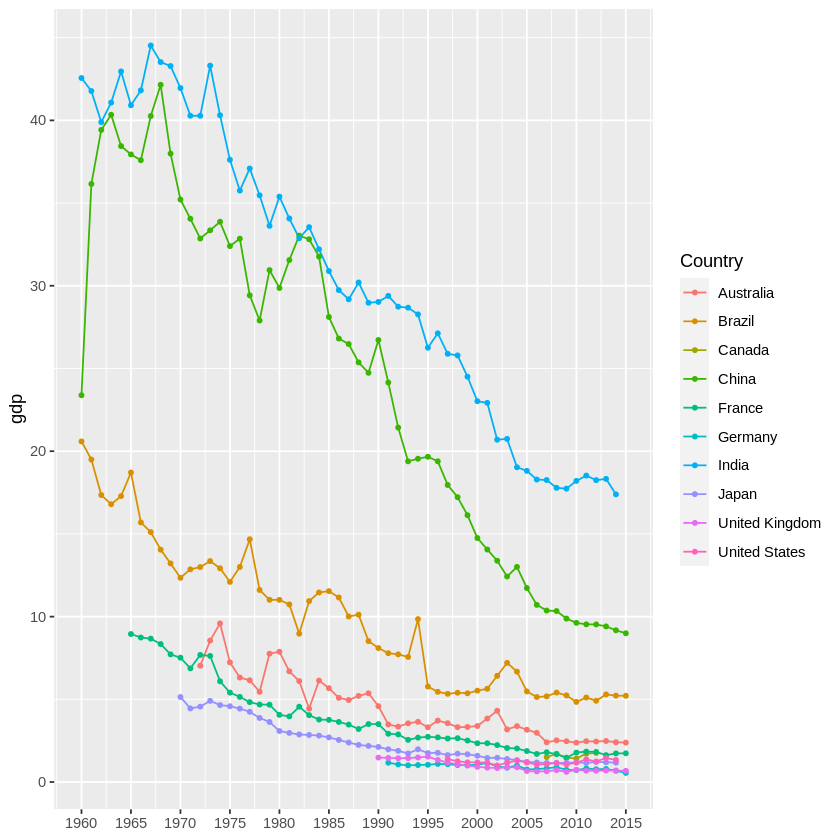

In [82]:
gg_ag_gdp <- ag_gdp_df_multi_level %>%
              ggplot(aes(x = year,
                         y = gdp,
                         group = Country))
                         
gg_ag_gdp +
      geom_line(aes(color = Country), na.rm = TRUE) +
      geom_point(aes(color = Country), size = 1, na.rm = TRUE) +
     labs(x = NULL) +
     scale_x_continuous(breaks = c(1960, 1965, 1970, 1975, 1980, 1985, 1990,1995, 2000, 2005, 2010, 2015),
                        labels = c("1960", "1965","1970","1975","1980","1985","1990", "1995","2000","2005","2010","2015"))

# ag_gdp_df_multi_level %>% distinct(year) %>% nrow()

## Example 5 (Daily data)

In [102]:
temp = as.Date("2017-06-14") - 0:364 
temp[order(temp, decreasing = FALSE)]

[1] "2016-06-15" "2016-06-16" "2016-06-17" "2016-06-18" "2016-06-19"
  [6] "2016-06-20" "2016-06-21" "2016-06-22" "2016-06-23" "2016-06-24"
 [11] "2016-06-25" "2016-06-26" "2016-06-27" "2016-06-28" "2016-06-29"
 [16] "2016-06-30" "2016-07-01" "2016-07-02" "2016-07-03" "2016-07-04"
 [21] "2016-07-05" "2016-07-06" "2016-07-07" "2016-07-08" "2016-07-09"
 [26] "2016-07-10" "2016-07-11" "2016-07-12" "2016-07-13" "2016-07-14"
 [31] "2016-07-15" "2016-07-16" "2016-07-17" "2016-07-18" "2016-07-19"
 [36] "2016-07-20" "2016-07-21" "2016-07-22" "2016-07-23" "2016-07-24"
 [41] "2016-07-25" "2016-07-26" "2016-07-27" "2016-07-28" "2016-07-29"
 [46] "2016-07-30" "2016-07-31" "2016-08-01" "2016-08-02" "2016-08-03"
 [51] "2016-08-04" "2016-08-05" "2016-08-06" "2016-08-07" "2016-08-08"
 [56] "2016-08-09" "2016-08-10" "2016-08-11" "2016-08-12" "2016-08-13"
 [61] "2016-08-14" "2016-08-15" "2016-08-16" "2016-08-17" "2016-08-18"
 [66] "2016-08-19" "2016-08-20" "2016-08-21" "2016-08-22" "2016-08-23"
 [71] "2016-08-24" "2016-08-25" "2016-08-26" "2016-08-27" "2016-08-28"
 [76] "2016-08-29" "2016-08-30" "2016-08-31" "2016-09-01" "2016-09-02"
 [81] "2016-09-03" "2016-09-04" "2016-09-05" "2016-09-06" "2016-09-07"
 [86] "2016-09-08" "2016-09-09" "2016-09-10" "2016-09-11" "2016-09-12"
 [91] "2016-09-13" "2016-09-14" "2016-09-15" "2016-09-16" "2016-09-17"
 [96] "2016-09-18" "2016-09-19" "2016-09-20" "2016-09-21" "2016-09-22"
[101] "2016-09-23" "2016-09-24" "2016-09-25" "2016-09-26" "2016-09-27"
[106] "2016-09-28" "2016-09-29" "2016-09-30" "2016-10-01" "2016-10-02"
[111] "2016-10-03" "2016-10-04" "2016-10-05" "2016-10-06" "2016-10-07"
[116] "2016-10-08" "2016-10-09" "2016-10-10" "2016-10-11" "2016-10-12"
[121] "2016-10-13" "2016-10-14" "2016-10-15" "2016-10-16" "2016-10-17"
[126] "2016-10-18" "2016-10-19" "2016-10-20" "2016-10-21" "2016-10-22"
[131] "2016-10-23" "2016-10-24" "2016-10-25" "2016-10-26" "2016-10-27"
[136] "2016-10-28" "2016-10-29" "2016-10-30" "2016-10-31" "2016-11-01"
[141] "2016-11-02" "2016-11-03" "2016-11-04" "2016-11-05" "2016-11-06"
[146] "2016-11-07" "2016-11-08" "2016-11-09" "2016-11-10" "2016-11-11"
[151] "2016-11-12" "2016-11-13" "2016-11-14" "2016-11-15" "2016-11-16"
[156] "2016-11-17" "2016-11-18" "2016-11-19" "2016-11-20" "2016-11-21"
[161] "2016-11-22" "2016-11-23" "2016-11-24" "2016-11-25" "2016-11-26"
[166] "2016-11-27" "2016-11-28" "2016-11-29" "2016-11-30" "2016-12-01"
[171] "2016-12-02" "2016-12-03" "2016-12-04" "2016-12-05" "2016-12-06"
[176] "2016-12-07" "2016-12-08" "2016-12-09" "2016-12-10" "2016-12-11"
[181] "2016-12-12" "2016-12-13" "2016-12-14" "2016-12-15" "2016-12-16"
[186] "2016-12-17" "2016-12-18" "2016-12-19" "2016-12-20" "2016-12-21"
[191] "2016-12-22" "2016-12-23" "2016-12-24" "2016-12-25" "2016-12-26"
[196] "2016-12-27" "2016-12-28" "2016-12-29" "2016-12-30" "2016-12-31"
[201] "2017-01-01" "2017-01-02" "2017-01-03" "2017-01-04" "2017-01-05"
[206] "2017-01-06" "2017-01-07" "2017-01-08" "2017-01-09" "2017-01-10"
[211] "2017-01-11" "2017-01-12" "2017-01-13" "2017-01-14" "2017-01-15"
[216] "2017-01-16" "2017-01-17" "2017-01-18" "2017-01-19" "2017-01-20"
[221] "2017-01-21" "2017-01-22" "2017-01-23" "2017-01-24" "2017-01-25"
[226] "2017-01-26" "2017-01-27" "2017-01-28" "2017-01-29" "2017-01-30"
[231] "2017-01-31" "2017-02-01" "2017-02-02" "2017-02-03" "2017-02-04"
[236] "2017-02-05" "2017-02-06" "2017-02-07" "2017-02-08" "2017-02-09"
[241] "2017-02-10" "2017-02-11" "2017-02-12" "2017-02-13" "2017-02-14"
[246] "2017-02-15" "2017-02-16" "2017-02-17" "2017-02-18" "2017-02-19"
[251] "2017-02-20" "2017-02-21" "2017-02-22" "2017-02-23" "2017-02-24"
[256] "2017-02-25" "2017-02-26" "2017-02-27" "2017-02-28" "2017-03-01"
[261] "2017-03-02" "2017-03-03" "2017-03-04" "2017-03-05" "2017-03-06"
[266] "2017-03-07" "2017-03-08" "2017-03-09" "2017-03-10" "2017-03-11"
[271] "2017-03-12" "2017-03-13" "2017-03-14" "2017-03-15" "2017-03-16"
[276] "2017-03-17" "2017-03-18" "2017-03-19" "2017-03-20" "2017-03-21"
[281] "2017-03-22" "2017-0

In [104]:
 seq(-140, 224)^2

[1] 19600 19321 19044 18769 18496 18225 17956 17689 17424 17161 16900 16641
 [13] 16384 16129 15876 15625 15376 15129 14884 14641 14400 14161 13924 13689
 [25] 13456 13225 12996 12769 12544 12321 12100 11881 11664 11449 11236 11025
 [37] 10816 10609 10404 10201 10000  9801  9604  9409  9216  9025  8836  8649
 [49]  8464  8281  8100  7921  7744  7569  7396  7225  7056  6889  6724  6561
 [61]  6400  6241  6084  5929  5776  5625  5476  5329  5184  5041  4900  4761
 [73]  4624  4489  4356  4225  4096  3969  3844  3721  3600  3481  3364  3249
 [85]  3136  3025  2916  2809  2704  2601  2500  2401  2304  2209  2116  2025
 [97]  1936  1849  1764  1681  1600  1521  1444  1369  1296  1225  1156  1089
[109]  1024   961   900   841   784   729   676   625   576   529   484   441
[121]   400   361   324   289   256   225   196   169   144   121   100    81
[133]    64    49    36    25    16     9     4     1     0     1     4     9
[145]    16    25    36    49    64    81   100   121   144   169   196   225
[157]   256   289   324   361   400   441   484   529   576   625   676   729
[169]   784   841   900   961  1024  1089  1156  1225  1296  1369  1444  1521
[181]  1600  1681  1764  1849  1936  2025  2116  2209  2304  2401  2500  2601
[193]  2704  2809  2916  3025  3136  3249  3364  3481  3600  3721  3844  3969
[205]  4096  4225  4356  4489  4624  4761  4900  5041  5184  5329  5476  5625
[217]  5776  5929  6084  6241  6400  6561  6724  6889  7056  7225  7396  7569
[229]  7744  7921  8100  8281  8464  8649  8836  9025  9216  9409  9604  9801
[241] 10000 10201 10404 10609 10816 11025 11236 11449 11664 11881 12100 12321
[253] 12544 12769 12996 13225 13456 13689 13924 14161 14400 14641 14884 15129
[265] 15376 15625 15876 16129 16384 16641 16900 17161 17424 17689 17956 18225
[277] 18496 18769 19044 19321 19600 19881 20164 20449 20736 21025 21316 21609
[289] 21904 22201 22500 22801 23104 23409 23716 24025 24336 24649 24964 25281
[301] 25600 25921 26244 26569 26896 27225 27556 27889 28224 28561 28900 29241
[313] 29584 29929 30276 30625 30976 31329 31684 32041 32400 32761 33124 33489
[325] 33856 34225 34596 34969 35344 35721 36100 36481 36864 37249 37636 38025
[337] 38416 38809 39204 39601 40000 40401 40804 41209 41616 42025 42436 42849
[349] 43264 43681 44100 44521 44944 45369 45796 46225 46656 47089 47524 47961
[361] 48400 48841 49284 49729 50176

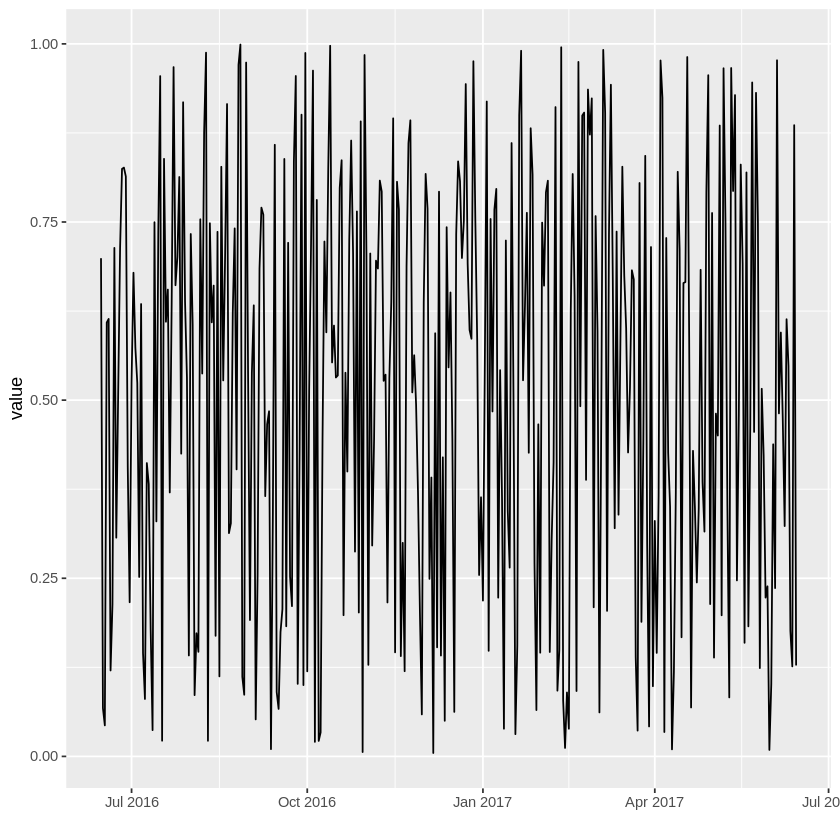

In [105]:
# Dummy data
data <- data.frame(
  day = temp,
  value = runif(365) 
)

# Most basic bubble plot
p <- ggplot(data, aes(x=day, y=value)) +
  geom_line() + 
  xlab("")

p

[1] "2016-06-15" "2016-06-16" "2016-06-17" "2016-06-18" "2016-06-19"
  [6] "2016-06-20" "2016-06-21" "2016-06-22" "2016-06-23" "2016-06-24"
 [11] "2016-06-25" "2016-06-26" "2016-06-27" "2016-06-28" "2016-06-29"
 [16] "2016-06-30" "2016-07-01" "2016-07-02" "2016-07-03" "2016-07-04"
 [21] "2016-07-05" "2016-07-06" "2016-07-07" "2016-07-08" "2016-07-09"
 [26] "2016-07-10" "2016-07-11" "2016-07-12" "2016-07-13" "2016-07-14"
 [31] "2016-07-15" "2016-07-16" "2016-07-17" "2016-07-18" "2016-07-19"
 [36] "2016-07-20" "2016-07-21" "2016-07-22" "2016-07-23" "2016-07-24"
 [41] "2016-07-25" "2016-07-26" "2016-07-27" "2016-07-28" "2016-07-29"
 [46] "2016-07-30" "2016-07-31" "2016-08-01" "2016-08-02" "2016-08-03"
 [51] "2016-08-04" "2016-08-05" "2016-08-06" "2016-08-07" "2016-08-08"
 [56] "2016-08-09" "2016-08-10" "2016-08-11" "2016-08-12" "2016-08-13"
 [61] "2016-08-14" "2016-08-15" "2016-08-16" "2016-08-17" "2016-08-18"
 [66] "2016-08-19" "2016-08-20" "2016-08-21" "2016-08-22" "2016-08-23"
 [71] "2016-08-24" "2016-08-25" "2016-08-26" "2016-08-27" "2016-08-28"
 [76] "2016-08-29" "2016-08-30" "2016-08-31" "2016-09-01" "2016-09-02"
 [81] "2016-09-03" "2016-09-04" "2016-09-05" "2016-09-06" "2016-09-07"
 [86] "2016-09-08" "2016-09-09" "2016-09-10" "2016-09-11" "2016-09-12"
 [91] "2016-09-13" "2016-09-14" "2016-09-15" "2016-09-16" "2016-09-17"
 [96] "2016-09-18" "2016-09-19" "2016-09-20" "2016-09-21" "2016-09-22"
[101] "2016-09-23" "2016-09-24" "2016-09-25" "2016-09-26" "2016-09-27"
[106] "2016-09-28" "2016-09-29" "2016-09-30" "2016-10-01" "2016-10-02"
[111] "2016-10-03" "2016-10-04" "2016-10-05" "2016-10-06" "2016-10-07"
[116] "2016-10-08" "2016-10-09" "2016-10-10" "2016-10-11" "2016-10-12"
[121] "2016-10-13" "2016-10-14" "2016-10-15" "2016-10-16" "2016-10-17"
[126] "2016-10-18" "2016-10-19" "2016-10-20" "2016-10-21" "2016-10-22"
[131] "2016-10-23" "2016-10-24" "2016-10-25" "2016-10-26" "2016-10-27"
[136] "2016-10-28" "2016-10-29" "2016-10-30" "2016-10-31" "2016-11-01"
[141] "2016-11-02" "2016-11-03" "2016-11-04" "2016-11-05" "2016-11-06"
[146] "2016-11-07" "2016-11-08" "2016-11-09" "2016-11-10" "2016-11-11"
[151] "2016-11-12" "2016-11-13" "2016-11-14" "2016-11-15" "2016-11-16"
[156] "2016-11-17" "2016-11-18" "2016-11-19" "2016-11-20" "2016-11-21"
[161] "2016-11-22" "2016-11-23" "2016-11-24" "2016-11-25" "2016-11-26"
[166] "2016-11-27" "2016-11-28" "2016-11-29" "2016-11-30" "2016-12-01"
[171] "2016-12-02" "2016-12-03" "2016-12-04" "2016-12-05" "2016-12-06"
[176] "2016-12-07" "2016-12-08" "2016-12-09" "2016-12-10" "2016-12-11"
[181] "2016-12-12" "2016-12-13" "2016-12-14" "2016-12-15" "2016-12-16"
[186] "2016-12-17" "2016-12-18" "2016-12-19" "2016-12-20" "2016-12-21"
[191] "2016-12-22" "2016-12-23" "2016-12-24" "2016-12-25" "2016-12-26"
[196] "2016-12-27" "2016-12-28" "2016-12-29" "2016-12-30" "2016-12-31"
[201] "2017-01-01" "2017-01-02" "2017-01-03" "2017-01-04" "2017-01-05"
[206] "2017-01-06" "2017-01-07" "2017-01-08" "2017-01-09" "2017-01-10"
[211] "2017-01-11" "2017-01-12" "2017-01-13" "2017-01-14" "2017-01-15"
[216] "2017-01-16" "2017-01-17" "2017-01-18" "2017-01-19" "2017-01-20"
[221] "2017-01-21" "2017-01-22" "2017-01-23" "2017-01-24" "2017-01-25"
[226] "2017-01-26" "2017-01-27" "2017-01-28" "2017-01-29" "2017-01-30"
[231] "2017-01-31" "2017-02-01" "2017-02-02" "2017-02-03" "2017-02-04"
[236] "2017-02-05" "2017-02-06" "2017-02-07" "2017-02-08" "2017-02-09"
[241] "2017-02-10" "2017-02-11" "2017-02-12" "2017-02-13" "2017-02-14"
[246] "2017-02-15" "2017-02-16" "2017-02-17" "2017-02-18" "2017-02-19"
[251] "2017-02-20" "2017-02-21" "2017-02-22" "2017-02-23" "2017-02-24"
[256] "2017-02-25" "2017-02-26" "2017-02-27" "2017-02-28" "2017-03-01"
[261] "2017-03-02" "2017-03-03" "2017-03-04" "2017-03-05" "2017-03-06"
[266] "2017-03-07" "2017-03-08" "2017-03-09" "2017-03-10" "2017-03-11"
[271] "2017-03-12" "2017-03-13" "2017-03-14" "2017-03-15" "2017-03-16"
[276] "2017-03-17" "2017-03-18" "2017-03-19" "2017-03-20" "2017-03-21"
[281] "2017-03-22" "2017-0

In [91]:
library(zoo)
as.yearmon("2007-12")


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




[1] "Dec 2007"

# References

1. [Link](http://www.sthda.com/english/articles/32-r-graphics-essentials/128-plot-time-series-data-using-ggplot/)
2. [Link](https://cran.r-project.org/web/packages/ggfortify/vignettes/plot_ts.html)
3. [Link](https://www.r-graph-gallery.com/279-plotting-time-series-with-ggplot2.html)